In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, convert_weekly_panel_to_biweekly_panel, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance, add_missing_indicators
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis_weekly.parquet"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_0_crimes_100m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_0_crimes_100m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)

analysis='group_2_crimes_100m'

In [2]:
# Convert weekly panel to biweekly panel.
df = convert_weekly_panel_to_biweekly_panel(df, analysis)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary  = get_value_variable_names(df, analysis)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                                                  
                                                 \emph{Independent Variable}                                      
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_2_crimes_100m        1.071900e-03   
                                                 pre_treatment_change_in_group_2_crimes_100m       2.063715e-05   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                5.917521e-18   
                                                 job_density_2013                                  7.451000e-01   
                                                 med_hhinc2016                                     4.226467e-07   
                                                 poor_share2010                                    2.572658e-02   
                                                 popdensity2010                                    1.015603e-09   
Panel C: Case Initiation                         for_cause                                         2.810897e-01   
                                                 no_cause                                          4.516610e-01   
                                                 non_payment                                       2.247651e-01   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                          2.821604e-01   
                                                 hasAttyP                                          2.050552e-01   
                                                 isEntityD                                         3.881789e-41   
                                                 isEntityP                                         1.093857e-02   

                                                                                                            
                                                                                                            
                                                 \emph{Independent Variable}                                
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_2_crimes_100m   3.779599e-02  
                                                 pre_treatment_change_in_group_2_crimes_100m  1.332943e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                           7.782860e-01  
                                                 job_density_2013                             5.178933e-01  
                                                 med_hhinc2016                                1.224981e-01  
                                                 poor_share2010                               5.297634e-01  
                                                 popdensity2010                               6.607443e-03  
Panel C: Case Initiation                         for_cause                                    1.764482e-08  
                                                 no_cause                                     8.995981e-01  
                                                 non_payment                                  4.059912e-07  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                     2.094824e-05  
                                                 hasAttyP                                     6.226457e-04  
                                                 isEntityD                                    1.265289e-02  
                                                 isEntityP                                    2.625077e-07

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                    Cases Won by Plaintiff   
Panel A total_twenty_seventeen_group_2_crimes_100m                7.199370   
        pre_treatment_change_in_group_2_crimes_100m               0.031480   
Panel B frac_coll_plus2010                                        0.322882   
        med_hhinc2016                                         48035.651626   
        poor_share2010                                            0.273292   
        popdensity2010                                        23086.043553   
Panel D isEntityD                                                 0.014166   
        isEntityP                                                 0.808499   

                                                    Difference in Cases Won by Defendant  \
                                                                              Unweighted   
Panel A total_twenty_seventeen_group_2_crimes_100m                              0.536165   
        pre_treatment_change_in_group_2_crimes_100m                            -0.034062   
Panel B frac_coll_plus2010                                                      0.002115   
        med_hhinc2016                                                        1312.556234   
        poor_share2010                                                         -0.003079   
        popdensity2010                                                       1225.145069   
Panel D isEntityD                                                              -0.011791   
        isEntityP                                                              -0.064959   

                                                                               \
                                                         \emph{p}    Weighted   
Panel A total_twenty_seventeen_group_2_crimes_100m   3.779599e-02   -0.052279   
        pre_treatment_change_in_group_2_crimes_100m  1.332943e-01   -0.001533   
Panel B frac_coll_plus2010                           7.782860e-01   -0.003130   
        med_hhinc2016                                1.224981e-01 -429.959325   
        poor_share2010                               5.297634e-01   -0.002824   
        popdensity2010                               6.607443e-03 -185.345884   
Panel D isEntityD                                    1.265289e-02   -0.000563   
        isEntityP                                    2.625077e-07   -0.010356   

                                                               
                                                     \emph{p}  
Panel A total_twenty_seventeen_group_2_crimes_100m   0.831528  
        pre_treatment_change_in_group_2_crimes_100m  0.945353  
Panel B frac_coll_plus2010                           0.677622  
        med_hhinc2016                                0.599304  
        poor_share2010                               0.567188  
        popdensity2010                               0.648186  
Panel D isEntityD                                    0.899937  
        isEntityP                                    0.298312

In [5]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable='file_week',
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name='file_week', freq='2W', base_period='varying')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 9648/9648 [01:56<00:00, 82.62it/s] 


KeyError: 'file_week_alias'

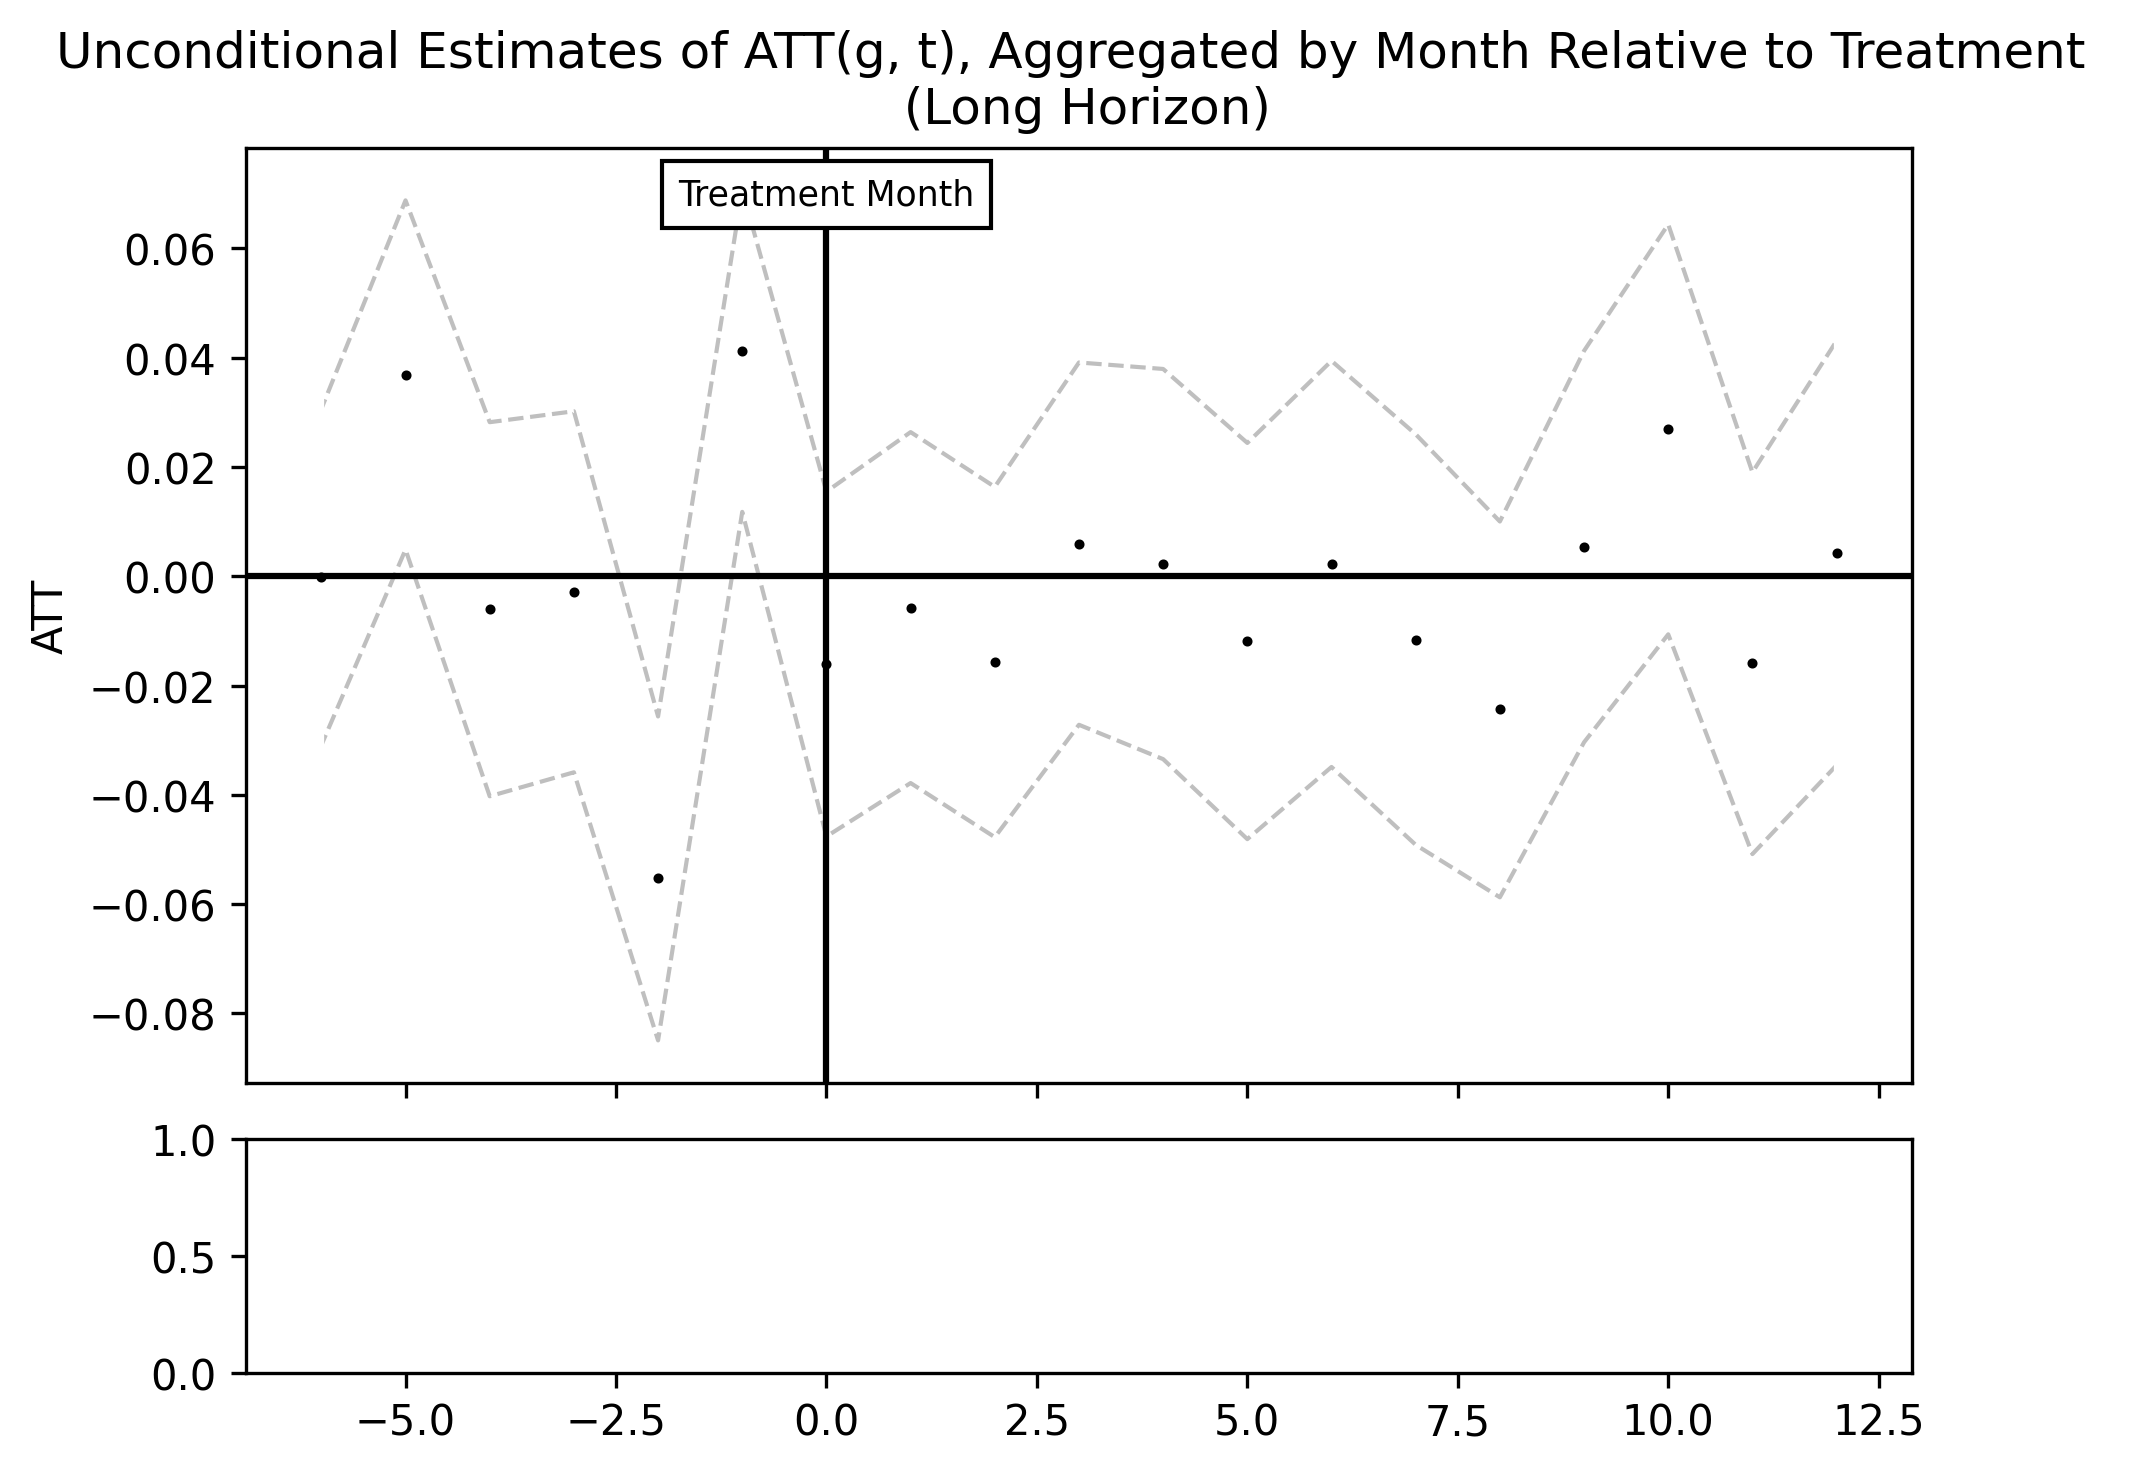

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-6, end_period=12,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable='file_week', df=df)

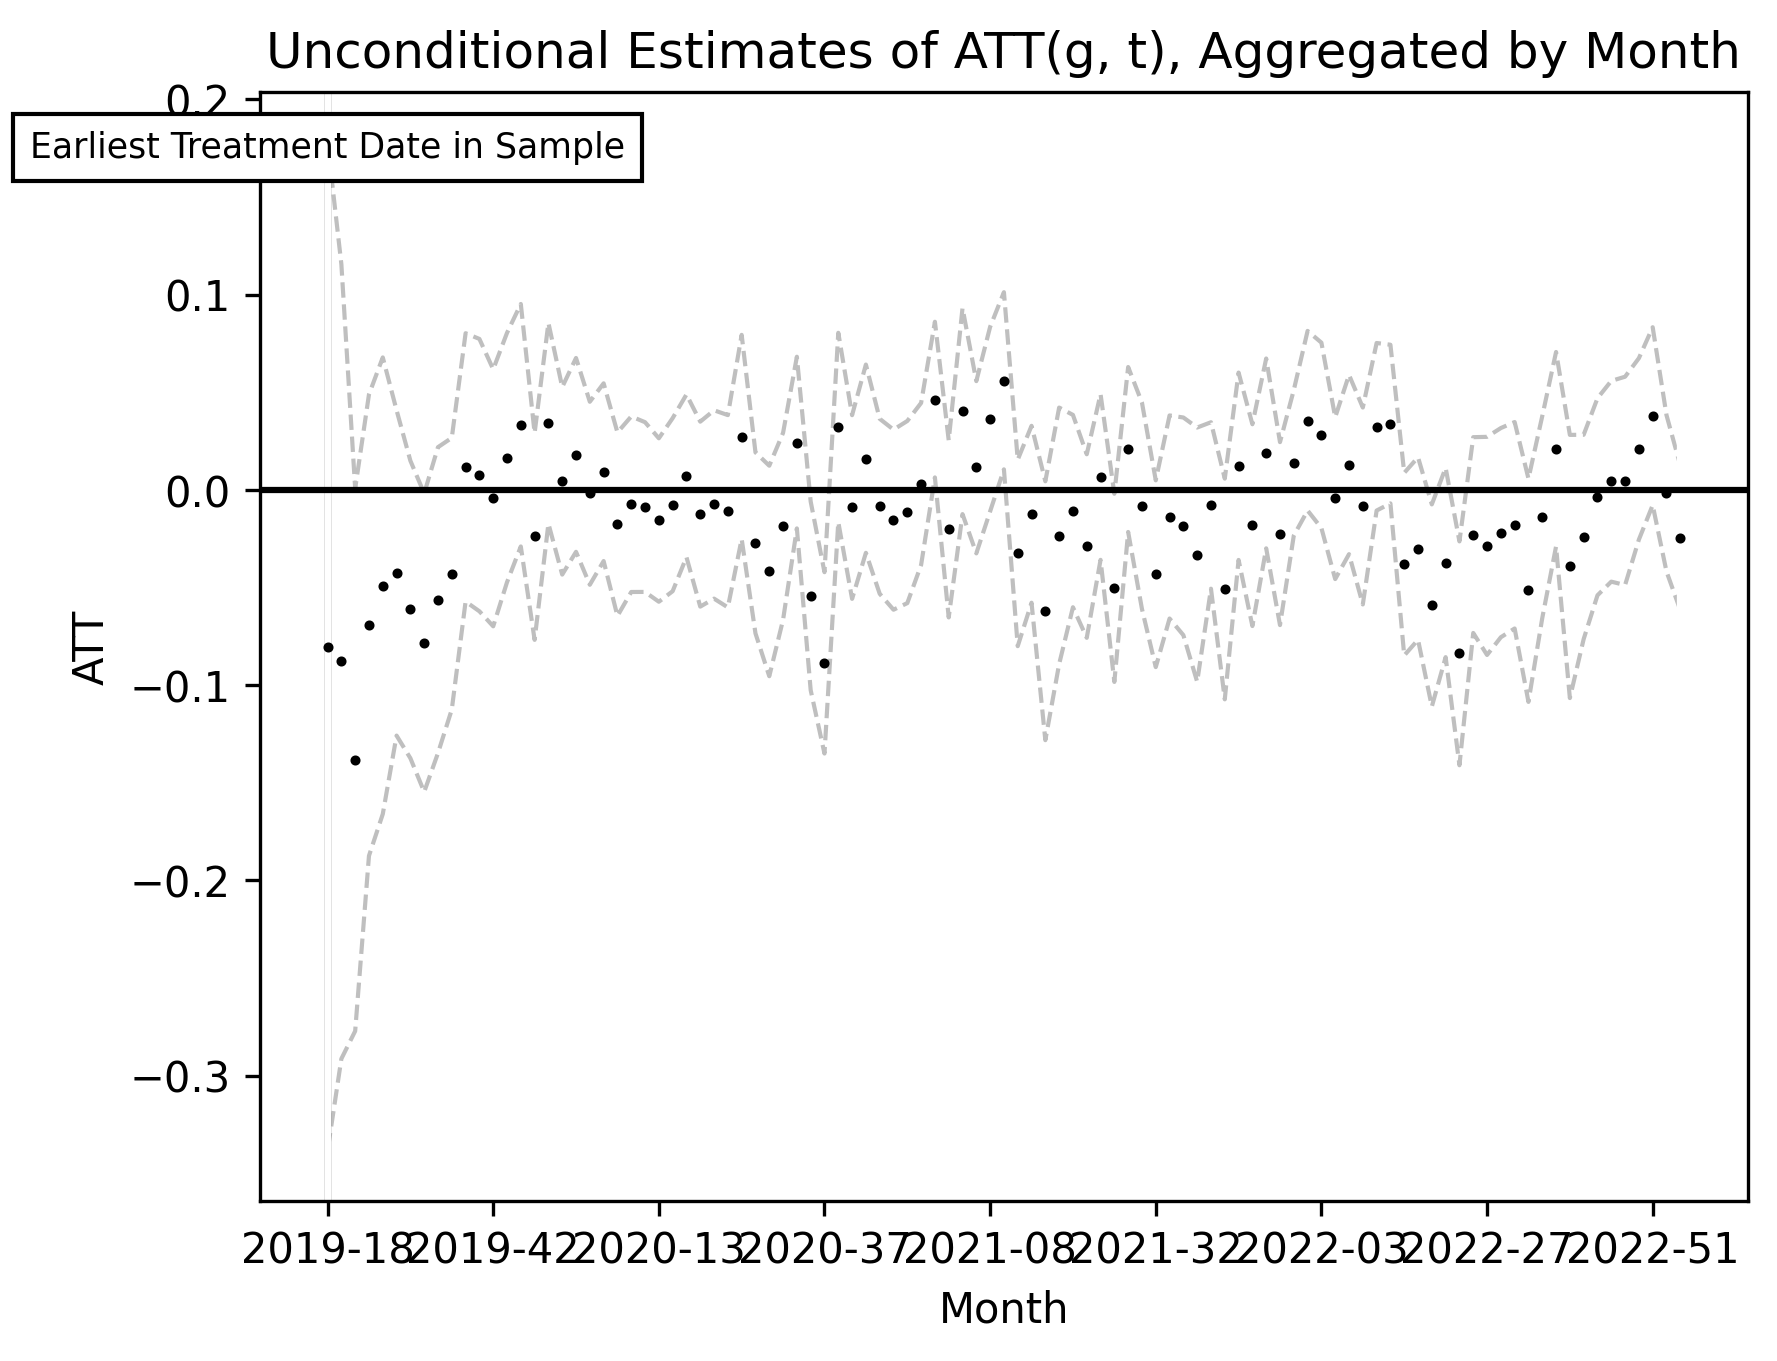

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [9]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name='file_week', freq='M', base_period='varying')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=10]    8%|█▋                  | 794/9648 [00:42<07:48, 18.88it/s] 


KeyboardInterrupt: 

In [ ]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-3,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable='file_week', df=df)

In [ ]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")